In [535]:
Pytorch_workflow = {1: "Data (Prepare and Load)",
                    2: "Building a Model",
                    3: "Fitting the model to data (Training process)",
                    4: "Making predictions and Evaluating a model",
                    5: "Saving and Loading a model",
                    6: "Putting it all together"}

**STEP 1 : CREATING DATA OR DATA PREPROCESSING**

In [536]:
import torch

# nn contains all of PyTorch's building blocks for neural networks
from torch import nn

import matplotlib.pyplot as plt

In [537]:
tensor1 = torch.arange(1,10).reshape(3,3)
tensor1

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [538]:
tensor1[:]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [539]:
# Select the first row but return it as a 2D array with one row.

tensor1[:1]

tensor([[1, 2, 3]])

In [540]:
tensor1[:2]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [541]:
tensor1[:3]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [542]:
tensor1[0:1]

tensor([[1, 2, 3]])

In [543]:
tensor1[0:2]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [544]:
# slicing operation that selects a specific slice across the dimensions of the tensor.

## : represents select all row value
## ,0 represents select elements from the first column
## tensor1[row,column]

tensor1[:,0]

tensor([1, 4, 7])

In [545]:
## : represents select all row value
## ,1 represents select elements from the second column

tensor1[:,1]

tensor([2, 5, 8])

In [546]:
## 0:1 represents select row value index 0 to 0
## ,0 represents select elements from the first column

tensor1[0:1,0]

tensor([1])

In [547]:
tensor1[0:2,0]

tensor([1, 4])

In [548]:
## row index 0 to index 1 and all column value

tensor1[0:2,:]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [549]:
## Let's create our data as a straight line. (y = w.x + b)

## x = features, y = labels

## We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

## create known parameters

w = 0.7
b = 0.3

## create data

start = 0
end = 1
step = 0.02

x = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = w * x + b

In [550]:
# 50 rows and 1 column
## x represents a batch of data where each sample has only one feature. (50 no of samples and one feature)

x.shape

torch.Size([50, 1])

In [551]:
x[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [552]:
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

In [553]:
## Now we're going to move towards building a model that can learn the relationship between X (features) and y (labels).

## Split data into training and test sets
## But before we build a model we need to split it up.
## One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

## 80% for training and 20% for testing

## 80% of the data for training the model (X_train and y_train) and 20% for testing the model (X_test and y_test).

train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]

x_test, y_test = x[train_split:], y[train_split:]

In [554]:
## Here total 50 samples are there, 50 samples 80% for training = 40 and test = 10

train_split

40

In [555]:
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [556]:
## The model we create is going to try and learn the relationship between X_train & y_train and then we will evaluate what it learns on X_test and y_test.

## Let's create a function to visualize it.

def plot_view(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions=None) :

  plt.figure(figsize = (4,4))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s = 4, label="Training Data")

  plt.scatter(test_data,test_labels, c="g", s = 4, label="Test Data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 9})


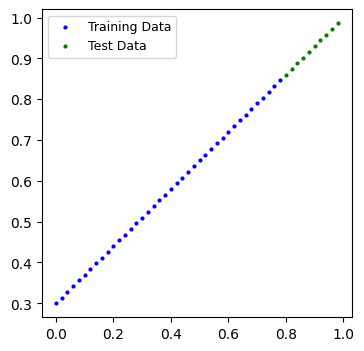

In [557]:
plot_view()

**STEP 2 : BUILD MODEL**

In [558]:
## Now we've got some data, let's build a model to use the blue dots to predict the green dots.

## Let's replicate a standard linear regression model using pure PyTorch.

class Linearclass(nn.Module):

  def __init__(self):

    super().__init__()

    #start with random weights ,this will get adjusted as the model learns.
    # can we update this value with gradient descent? (requires_grad=True)
    # initialize model parameters

    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float, requires_grad=True))

    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

## forward method defined computation of the model

  def forward(self, x:torch.tensor) -> torch.Tensor:

    ## "x" is the input data (e.g. training/testing features)
    ## linear regression formula (y = w*x + b)

    return self.weights * x + self.bias

In [559]:
## PyTorch model building essentials
## Four essential modules you can use to create almost any kind of neural network you can imagine.
## torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader

## almost everything in a PyTorch neural network comes from torch.nn
## nn.Module contains the larger building blocks for neural networks (layers) (base class for all neural network module)
## nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
## forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

## torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

## Basic building blocks of creating a PyTorch model by subclassing nn.Module. For objects that subclass nn.Module, the forward() method must be defined.

In [560]:
## Now, Checking the contents of a PyTorch model

# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# create an instance of the model
model1 = Linearclass()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [561]:
## We can also get the state (what the model contains) of the model using .state_dict()
## List named parameters

model1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [562]:
## Making predictions using torch.inference_mode()

## To check this we can pass it the test data X_test to see how closely it predicts y_test.

## When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

## Let's make some predictions.

In [563]:
## torch.inference_mode() is used when using a model for inference (making predictions).

## torch.inference_mode() turns off a bunch of things.

## (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

## In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things

with torch.inference_mode():

  y_preds = model1(x_test)

In [564]:
# check the prediction

## Notice how there's one prediction value per testing sample.

## This is because of the kind of data we're using. For our straight line, one X value maps to one y value.

## However, machine learning models are very flexible. You could have 100 X values mapping to one, two, three or 10 y values.

print(f"No of test samples : {len(x_test)}")
print(f"No of predictions samples : {len(y_preds)}")
print(f"original labels value : {y_test}")
print(f"predicted labels value : {y_preds}")

No of test samples : 10
No of predictions samples : 10
original labels value : tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
predicted labels value : tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


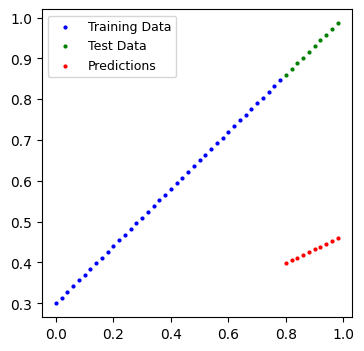

In [565]:
# let's visualize them with predicted value

plot_view(predictions = y_preds)

In [566]:
# Error= (Actual - predicted)

y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [567]:
## predictions look pretty bad...

## This make sense though when you remember our model is just using random parameter values to make predictions.

## It hasn't even looked at the blue dots to try to predict the green dots.

## Time to change that.

**STEP 3 : TRAIN MODEL**

In [568]:
## Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

## To fix that, we can update its internal parameters (also refer to parameters as patterns)

## weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

## Much of the time you won't know what the ideal parameters are for a model.

In [569]:
## Creating a loss function and optimizer in PyTorch

## For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

## And that's a loss function as well as an optimizer.

## Loss function : Measures how wrong your models predictions labels(e.g. y_preds) are compared to the truth labels (e.g. y_test).
## Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).
##Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

## Optimizer: Tells your model how to update its internal parameters to best lower the loss.
## Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).


## Let's create a loss function and an optimizer we can use to help improve our model.
## loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

In [570]:
## For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

## Loss Function::   MAE = absolute difference (y_pred[0] - y_test) and repeat calculation of all sample and take the mean.

## Optimizer::  we'll use SGD, torch.optim.SGD(params, lr) where:

## params is the target(predicted) model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
## lr is the learning rate you'd like the optimizer to update the parameters.

## higher lr means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work)
## lower lr means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values)

## The learning rate is considered a hyperparameter.
## Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling)


In [571]:
## create loss function

loss_fn = nn.L1Loss()

## create the optimizer (params : parameter of target model to optimize)
## learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)

In [572]:
## Creating an optimization loop in PyTorch

## The training loop involves the model going through the training data and learning the relationships between the features and labels.

## The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data.

## Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

In [573]:
## PyTorch training loop

## Step 1 : Forward Pass :  model(x_train)
## The model goes through all of the training data once, performing its forward() function calculations.

## Step 2 : Calculate the loss :  loss = loss_fn(y_preds, y_test)
## The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.

## Step 3 : Zero gradients :  optimizer.zero_grad()
## The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.

## Step 5 : Perform backpropagation on the loss :  loss.backward()
## Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".

## Step 6 : Update the optimizer (gradient descent) :  optimizer.step()
## Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.

In [574]:
# pass the data through the model for a number of epochs (e.g. 100 for 100 passes of data)
# for epoch in range(epochs):

  # put model in training mode (this is the default state of a model)
#  model.train()

  # 1. Forward pass on train data using the forward() method inside.
#  y_pred = model(x_train)

  # 2. calculate loss
#  loss = loss_fn(y_pred, y_test)

  # 3. Zero the gradients of the optimizer.
#  optimizer.zero_grad()

  # 4. perform backpropagation on the loss
#  loss.backward()

  # 5. progress/step the optimizer (gradient descent)
#  optimizer.step()

In [575]:
## Pytorch testing loop (Evaluating model)

## Step 1 : Forward Pass : model(x_test)
## The model goes through all of the testing data once, performing its forward() function calculations.

## Step 2 : Calculate the loss : loss = loss_fn(y_pred, y_test)
## The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.

## Step 3 : Calulate evaluation metrics (optional) : Custom functions
## Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.

## the testing loop doesn't contain performing backpropagation or stepping the optimizer, this is because no parameters in the model are being changed during testing,
## they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

In [576]:
# Setup empty list to keep track of model progress
#epoch_count = []
#train_loss_values = []
#test_loss_values = []

# pass the data through the model for a number of epochs (e.g. 100 for 100 passes of data)
#for epoch in range(epochs):

  ### Training loop code here

  ### Testing loop starts

  # put the model in evaluation mode
#  model.eval()

  # Turn on inference mode context manager
#  with torch.inference_mode():

    ## 1. Forward pass on test data
#    test_pred = model(x_test)

    ## 2. Calculate loss
 #   test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening every 10 epochs
#  if epoch % 10 == 0 :
#    epoch_count.append(epoch)
#    train_loss_values.append(loss)
#    test_loss_values.append(test_loss)
#    print(f"Epoch: {epoch}, MAE train loss: {loss}, MAE test loss: {test_loss}")

In [577]:
## train our model for 100 epochs (forward passes through the data) and we'll evaluate it every 10 epochs.

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model1(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model1.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model1(x_test)

      # 2. Caculate loss on test data
      # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


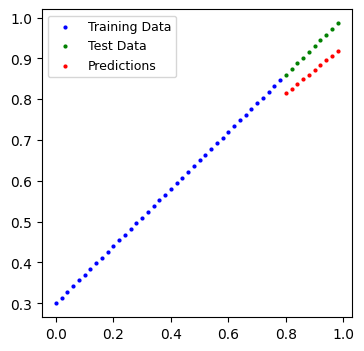

In [578]:
## Looks like our loss is going down with every epoch, let's plot it to find out.

plot_view(predictions = test_pred)

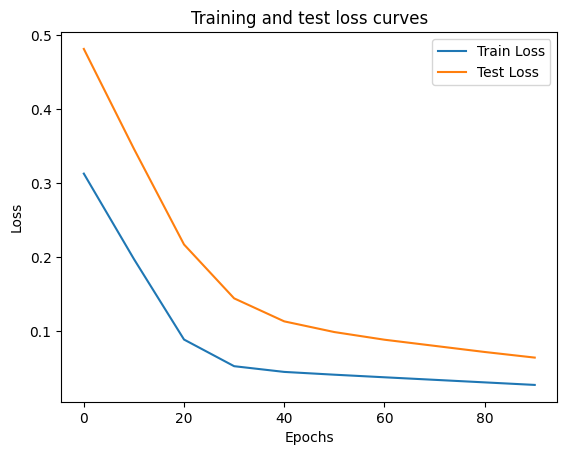

In [579]:
# Plot the loss curves

## The loss curves show the loss going down over time. Remember, loss is the measure of how wrong your model is, so the lower the better.
## But why did the loss go down?
## Well, thanks to our loss function and optimizer, the model's internal parameters (weights and bias) were updated to better reflect the underlying patterns in the data.

plt.plot(epoch_count,train_loss_values, label="Train Loss")
plt.plot(epoch_count,test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [580]:
## Lets see how close our model gets to the original values we set for weights and bias.
## Our model got very close to calculate the exact original values for weight and bias.

print("The model learned the following values for weights and bias:\n")
print(model1.state_dict())

print("\n\nActual values for weights and bias: \n")
print(f"Actual weight:{w}, Actual Bias:{b}")


The model learned the following values for weights and bias:

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


Actual values for weights and bias: 

Actual weight:0.7, Actual Bias:0.3


**STEP 4: Making predictions with a trained PyTorch model (inference)**

In [581]:
##  Three things to remember when making predictions (also called performing inference) with a PyTorch model:

## 1. Set the model in evaluation mode (model.eval()).
## 2. Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
## 3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

# 1. Set the model in evaluation mode
model1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model1.to(device)
  # x_test = x_test.to(device)
  y_preds = model1(x_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

**STEP 5 : Saving and loading a PyTorch model**

In [582]:
## 1. We'll create a directory for saving models to called models using Python's pathlib module.
## 1. We'll create a file path to save the model to.
## 1. We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

# only saving the state_dict() only saves the models learned parameters
torch.save(obj=model1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [583]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Apr  9 15:21 models/01_pytorch_workflow_model_0.pth


**Building a PyTorch linear model (Another way)**

In [584]:
## instead of defining the weight and bias parameters of our model manually using nn.Parameter(), we'll use nn.Linear(in_features, out_features)

## in_features is the number of dimensions your input data has and out_features is the number of dimensions you'd like it to be output to.
## In our case, both of these are 1 since our data has 1 input feature (X) per label (y).

## Notice the outputs of model2.state_dict(), the nn.Linear() layer created a random weight and bias parameter.

class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x:torch.Tensor) -> torch.Tensor :

     return self.linear_layer(x)

torch.manual_seed(42)
model2 = LinearRegression()

model2, model2.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [585]:
# Check model device
next(model2.parameters()).device

device(type='cpu')

In [586]:
# Let's change it to be on the GPU (if it's available).
# Set model to GPU if it's availalble, otherwise it'll default to CPU

# the device variable was set above to be "cuda" if available or "cpu" if not

# If you do have access to a CUDA-enabled GPU, you should see an output of something like: device(type='cuda', index=0)

## model2.to(device)
## next(model2.parameters()).device

In [587]:
## need a add loss function and an optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.01)

In [588]:
## let's train and evaluate our model using a training and testing loop.

torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data on the available device (GPU)
# Without this, error will happen (not all model/data on device)
#X_train = X_train.to(device)
#X_test = X_test.to(device)
#y_train = y_train.to(device)
#y_test = y_test.to(device)

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # Training Loop
  model2.train()

  y_pred = model2(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing Loop
  model2.eval()

  with torch.inference_mode():
    test_pred = model2(x_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0 :

    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch : {epoch}, Train_Loss : {loss}, Test_loss : {test_loss}")

Epoch : 0, Train_Loss : 0.5551779866218567, Test_loss : 0.5739762187004089
Epoch : 10, Train_Loss : 0.4399680495262146, Test_loss : 0.4392663538455963
Epoch : 20, Train_Loss : 0.3247582018375397, Test_loss : 0.30455657839775085
Epoch : 30, Train_Loss : 0.20954827964305878, Test_loss : 0.16984674334526062
Epoch : 40, Train_Loss : 0.09433844685554504, Test_loss : 0.03513689711689949
Epoch : 50, Train_Loss : 0.023886386305093765, Test_loss : 0.04784906655550003
Epoch : 60, Train_Loss : 0.0199567973613739, Test_loss : 0.04580312222242355
Epoch : 70, Train_Loss : 0.016517987474799156, Test_loss : 0.0375305712223053
Epoch : 80, Train_Loss : 0.013089170679450035, Test_loss : 0.029944902285933495
Epoch : 90, Train_Loss : 0.009653178043663502, Test_loss : 0.02167237363755703
Epoch : 100, Train_Loss : 0.006215679459273815, Test_loss : 0.014086711220443249
Epoch : 110, Train_Loss : 0.002787243574857712, Test_loss : 0.005814164876937866
Epoch : 120, Train_Loss : 0.0012645035749301314, Test_loss : 

In [589]:
# Find our model's learned parameters ,compare with actual parameters

print(model2.state_dict())

print(f"Actual weight: {w}, Actual bias: {b} ")

OrderedDict([('linear_layer.weight', tensor([[0.6968]])), ('linear_layer.bias', tensor([0.3025]))])
Actual weight: 0.7, Actual bias: 0.3 


In [590]:
# Making Prediction
# Turn model into evaluation mode
model2.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model2(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

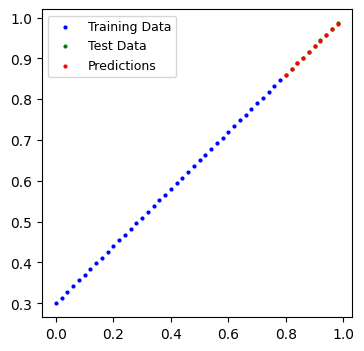

In [591]:
# plot_view(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
# plot_view(predictions=y_preds.cpu())

plot_view(predictions = y_preds)

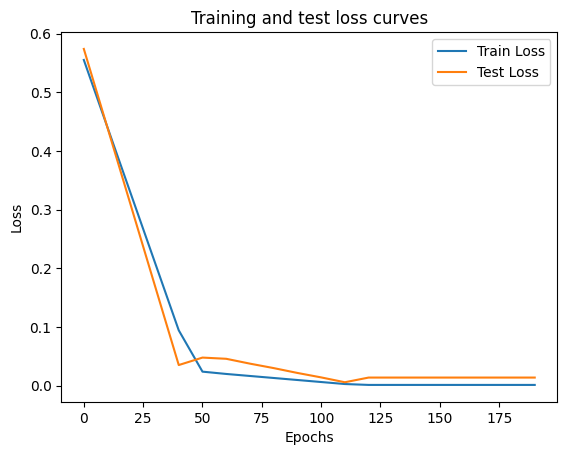

In [592]:
plt.plot(epoch_count,train_loss_values, label="Train Loss")
plt.plot(epoch_count,test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()